In [2]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Описание датасета:
Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

In [3]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

#### Тип "object" содержат несколько столбцов. Найдем какие значения в них содежаться

In [5]:
df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [6]:
df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [7]:
df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

#### Для участия модели замемин значения на цифры и преобразуем в тип INT

In [8]:
df.loc[df['Shops_2'] == "A", 'Shops_2'] = 0
df.loc[df['Shops_2'] == "B", 'Shops_2'] = 1
df['Shops_2']=df['Shops_2'].astype(int)
df.loc[df['Ecology_2'] == "A", 'Ecology_2'] = 0
df.loc[df['Ecology_2'] == "B", 'Ecology_2'] = 1
df['Ecology_2']=df['Ecology_2'].astype(int)
df.loc[df['Ecology_3'] == "A", 'Ecology_3'] = 0
df.loc[df['Ecology_3'] == "B", 'Ecology_3'] = 1
df['Ecology_3']=df['Ecology_3'].astype(int)
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int32  
 11  Ecology_3      10000 non-null  int32  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [10]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [11]:
df.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,0.003099,-0.005408,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.003645,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,-0.093406,-0.027902,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,-0.021018,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,-0.001971,-0.005909,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,-0.000146,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,0.029926,0.022748,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,-0.049380,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,0.006808,0.008597,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,-0.004692,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.000268,-0.007919,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,-0.017315,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,0.049661,0.025767,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,-0.013626,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,0.059347,0.009258,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.051002,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.000997,0.001686,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.002994,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,0.079809,-0.058381


In [142]:
df111=df.loc[df["Healthcare_1"].notnull()]
df111.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5.202000e+03,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000
mean,8380.733372,58.164360,1.922914,55.694241,36.226628,6.657824,8.212226,12.405229,5.837143e+03,0.145402,0.981353,0.947136,28.277201,5918.926759,13.179354,1142.904460,1.900038,5.081892,0.970396,227332.759591
std,4854.277437,47.304299,0.818937,22.228970,21.609821,27.601105,5.111028,6.579024,2.779904e+05,0.128172,0.135287,0.223784,13.174587,2700.135491,31.935192,1021.517264,1.516684,5.262228,0.169508,97832.205252
min,0.000000,0.000000,0.000000,2.596351,0.370619,0.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,0.000000,2.000000,528.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4202.500000,17.000000,1.000000,41.466277,23.202410,5.000000,4.000000,9.000000,1.969000e+03,0.035145,1.000000,1.000000,22.000000,4378.000000,1.000000,350.000000,1.000000,2.000000,1.000000,164359.140023
50%,8380.500000,52.000000,2.000000,51.390424,32.673146,6.000000,7.000000,12.000000,1.977000e+03,0.130618,1.000000,1.000000,27.000000,5735.000000,2.000000,900.000000,2.000000,4.000000,1.000000,199350.542240
75%,12593.500000,90.000000,2.000000,65.270484,45.338464,9.000000,11.000000,17.000000,1.996000e+03,0.243205,1.000000,1.000000,36.000000,7287.000000,8.000000,1548.000000,3.000000,6.000000,1.000000,265894.392887
max,16798.000000,209.000000,10.000000,641.065193,638.163193,1970.000000,42.000000,117.000000,2.005201e+07,0.458174,1.000000,1.000000,66.000000,12238.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


#### При анализе данных с использованием matplotlib выяснилось что встречаются "жилая площадь", которая бОльше чем "общая". Находим такие значения и меняем их местами.

In [143]:
df3=df.loc[df["LifeSquare"]>df["Square"]]
df3

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,1,1,0,168,0,NaN,0,0,1,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,1,1,15,2787,2,520.0,0,7,1,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,1,1,1,264,0,NaN,0,1,1,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,1,1,53,13670,4,NaN,1,11,1,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,1,1,22,6398,141,1046.0,3,23,1,126281.142781
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,1,1,1,388,0,NaN,0,0,1,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,1,1,2,469,0,NaN,0,0,1,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,1,1,37,6856,84,1940.0,2,5,1,381937.404161


In [144]:
df3_1=df.loc[df["LifeSquare"]<=df["Square"]]
df3_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


In [191]:
df4=df3.copy()
df4["LifeSquare"], df4["Square"]=df3["Square"], df3["LifeSquare"]
df4

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,1,1,0,168,0,NaN,0,0,1,95338.198549
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,1,1,15,2787,2,520.0,0,7,1,435462.048070
52,2301,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,1,1,1,264,0,NaN,0,1,1,199215.452229
123,8753,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,1,1,53,13670,4,NaN,1,11,1,309688.592681
153,9870,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.439082,59.015896,12.0,5,5.0,2016,0.000078,1,1,22,6398,141,1046.0,3,23,1,126281.142781
9889,12918,23,2.0,53.134243,51.440463,51.0,3,17.0,2017,0.005767,1,1,1,388,0,NaN,0,0,1,88150.012510
9895,2737,27,3.0,125.806981,123.430072,123.0,5,10.0,2015,0.017647,1,1,2,469,0,NaN,0,0,1,234194.837047
9902,14001,73,1.0,44.267551,44.098768,1.0,7,24.0,2014,0.042032,1,1,37,6856,84,1940.0,2,5,1,381937.404161


In [198]:
df5=pd.concat([df4,df3_1], axis=0)
df5

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,1,1,0,168,0,NaN,0,0,1,95338.198549
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,1,1,15,2787,2,520.0,0,7,1,435462.048070
52,2301,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,1,1,1,264,0,NaN,0,1,1,199215.452229
123,8753,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,1,1,53,13670,4,NaN,1,11,1,309688.592681
153,9870,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


In [193]:
df5.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,1.000000,0.012973,-0.005847,0.014484,-0.012142,0.019880,0.001348,-0.008376,0.005004,0.018097,0.003099,-0.005408,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.003645,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.012770,-0.060882,0.040358,-0.120373,-0.149051,0.013430,0.065294,-0.093406,-0.027902,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,-0.021018,0.265100
Rooms,-0.005847,0.071432,1.000000,0.193684,0.542908,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,-0.001971,-0.005909,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,-0.000146,0.550291
Square,0.014484,-0.012770,0.193684,1.000000,0.257438,0.000420,0.032569,0.028511,-0.002576,-0.026123,0.009314,0.008129,-0.032015,-0.023738,0.006012,-0.035468,-0.015614,-0.002815,-0.010338,0.142499
LifeSquare,-0.012142,-0.060882,0.542908,0.257438,1.000000,-0.005662,0.089602,0.040539,-0.008385,-0.066387,0.026811,0.033138,-0.133169,-0.107019,0.044829,-0.039563,-0.060406,-0.001928,-0.053934,0.366305
KitchenSquare,0.019880,0.040358,0.005123,0.000420,-0.005662,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.000268,-0.007919,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,-0.017315,0.028864
Floor,0.001348,-0.120373,-0.000665,0.032569,0.089602,-0.011397,1.000000,0.418986,0.000928,-0.016133,0.049661,0.025767,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,-0.013626,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.028511,0.040539,0.000780,0.418986,1.000000,-0.000864,-0.004362,0.059347,0.009258,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.051002,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.002576,-0.008385,0.000958,0.000928,-0.000864,1.000000,0.001465,0.000997,0.001686,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.002994,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.026123,-0.066387,-0.005622,-0.016133,-0.004362,0.001465,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,0.079809,-0.058381


#### "на глаз" посмотрим на сколько в среднем общая плохадь отличается от жилой

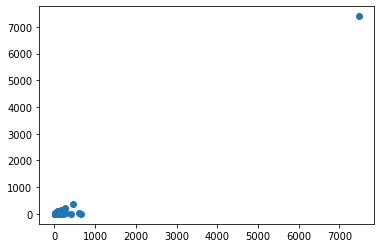

In [199]:
plt.scatter(df5["Square"], df5["Square"]-df5["LifeSquare"])

#### Видим, что есть квартиры с Большой общей площадью и с очень небольшой жилой. Найдем их

In [200]:
df5.query('Square-LifeSquare>1000')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,7480.592129,81.694417,1.0,9,17.0,2016,0.017647,1,1,2,469,0,NaN,0,0,1,217357.492366


#### Удалим эту запись

In [201]:
df5=df5.drop([4328])

In [202]:
df5

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,1,1,0,168,0,NaN,0,0,1,95338.198549
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,1,1,15,2787,2,520.0,0,7,1,435462.048070
52,2301,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,1,1,1,264,0,NaN,0,1,1,199215.452229
123,8753,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,1,1,53,13670,4,NaN,1,11,1,309688.592681
153,9870,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


In [203]:
df_1=df5.copy()
df_1["raz"]=df5["Square"]-df5["LifeSquare"]
df_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,...,1,0,168,0,NaN,0,0,1,95338.198549,1.437716
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,...,1,15,2787,2,520.0,0,7,1,435462.048070,2.129007
52,2301,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,...,1,1,264,0,NaN,0,1,1,199215.452229,3.824548
123,8753,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,...,1,53,13670,4,NaN,1,11,1,309688.592681,3.851446
153,9870,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,...,1,2,629,1,NaN,0,0,0,131797.472284,1.659828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,...,1,46,7960,6,350.0,3,11,1,196684.316040,19.925582
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,...,1,30,5562,0,NaN,0,5,0,189050.289571,20.982330
9997,5123,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,...,1,2,629,1,NaN,0,0,0,159143.805370,18.482038
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,...,0,30,5048,9,325.0,2,5,1,181595.339808,9.762414


In [204]:
df_1.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,5202.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,8382.590959,50.403140,1.890389,56.481073,37.274469,6.273827,8.526653,12.608961,3.990364e+03,0.118868,...,0.972497,24.689269,5352.645765,8.040004,1142.904460,1.319632,4.231723,0.917492,214138.535503,19.206604
std,4858.575511,43.589143,0.839481,21.565028,20.291044,28.562297,5.241408,6.776171,2.005103e+05,0.119027,...,0.163551,17.532023,4006.702533,23.832931,1021.517264,1.493617,4.806395,0.275151,92876.932714,11.611392
min,0.000000,0.000000,0.000000,2.377248,-1.067857,0.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.002943
25%,4169.000000,20.000000,1.000000,41.866636,23.312499,1.000000,4.000000,9.000000,1.974000e+03,0.017647,...,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153860.591184,15.194406
50%,8394.000000,36.000000,2.000000,52.623203,33.440452,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192261.963270,18.482038
75%,12591.500000,75.000000,2.000000,66.003090,46.209428,9.000000,12.000000,17.000000,2.001000e+03,0.195781,...,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249148.484733,22.380949
max,16798.000000,209.000000,19.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,...,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,383.404284


#### Меняем нулевые значения LifeSquare на Square- медиана

In [215]:
#df.loc[df["LifeSquare"].null(), "LifeSquare"] = df["Square"]-20.3364
df_1["LifeSquare"].fillna((df_1["Square"]-18.482038), inplace=True)

In [216]:
df_1.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,5202.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,8382.590959,50.403140,1.890389,56.481073,37.274469,6.273827,8.526653,12.608961,3.990364e+03,0.118868,...,0.972497,24.689269,5352.645765,8.040004,1142.904460,1.319632,4.231723,0.917492,214138.535503,19.206604
std,4858.575511,43.589143,0.839481,21.565028,20.291044,28.562297,5.241408,6.776171,2.005103e+05,0.119027,...,0.163551,17.532023,4006.702533,23.832931,1021.517264,1.493617,4.806395,0.275151,92876.932714,11.611392
min,0.000000,0.000000,0.000000,2.377248,-1.067857,0.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.002943
25%,4169.000000,20.000000,1.000000,41.866636,23.312499,1.000000,4.000000,9.000000,1.974000e+03,0.017647,...,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153860.591184,15.194406
50%,8394.000000,36.000000,2.000000,52.623203,33.440452,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192261.963270,18.482038
75%,12591.500000,75.000000,2.000000,66.003090,46.209428,9.000000,12.000000,17.000000,2.001000e+03,0.195781,...,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249148.484733,22.380949
max,16798.000000,209.000000,19.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,...,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,383.404284


In [218]:
df=df_1
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,...,1,0,168,0,NaN,0,0,1,95338.198549,1.437716
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,...,1,15,2787,2,520.0,0,7,1,435462.048070,2.129007
52,2301,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,...,1,1,264,0,NaN,0,1,1,199215.452229,3.824548
123,8753,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,...,1,53,13670,4,NaN,1,11,1,309688.592681,3.851446
153,9870,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,...,1,2,629,1,NaN,0,0,0,131797.472284,1.659828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,...,1,46,7960,6,350.0,3,11,1,196684.316040,19.925582
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,...,1,30,5562,0,NaN,0,5,0,189050.289571,20.982330
9997,5123,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,...,1,2,629,1,NaN,0,0,0,159143.805370,18.482038
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,...,0,30,5048,9,325.0,2,5,1,181595.339808,9.762414


#### построим гистраграммы распеределения разных парр-ов. Проверим есть ли ВЫБРОСЫ, и много ли их

In [219]:
df_num_features = df.select_dtypes(include='float64')

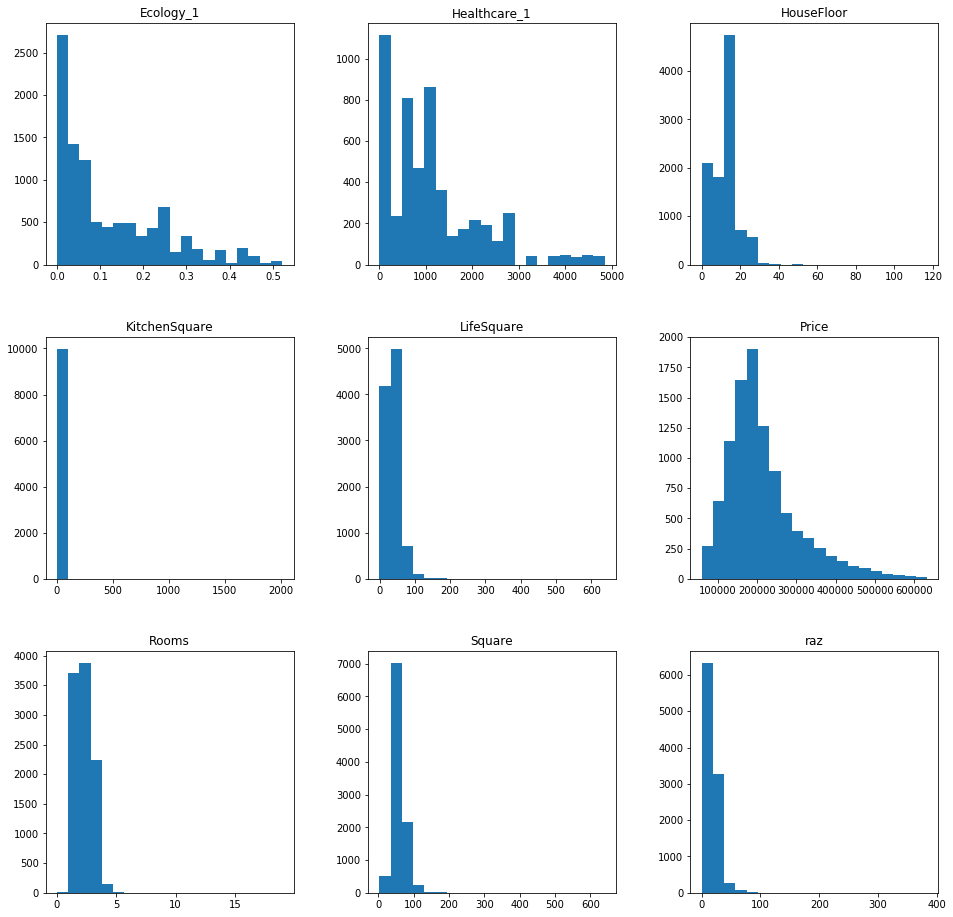

In [220]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [208]:
df_num_features = df.select_dtypes(include='int64')

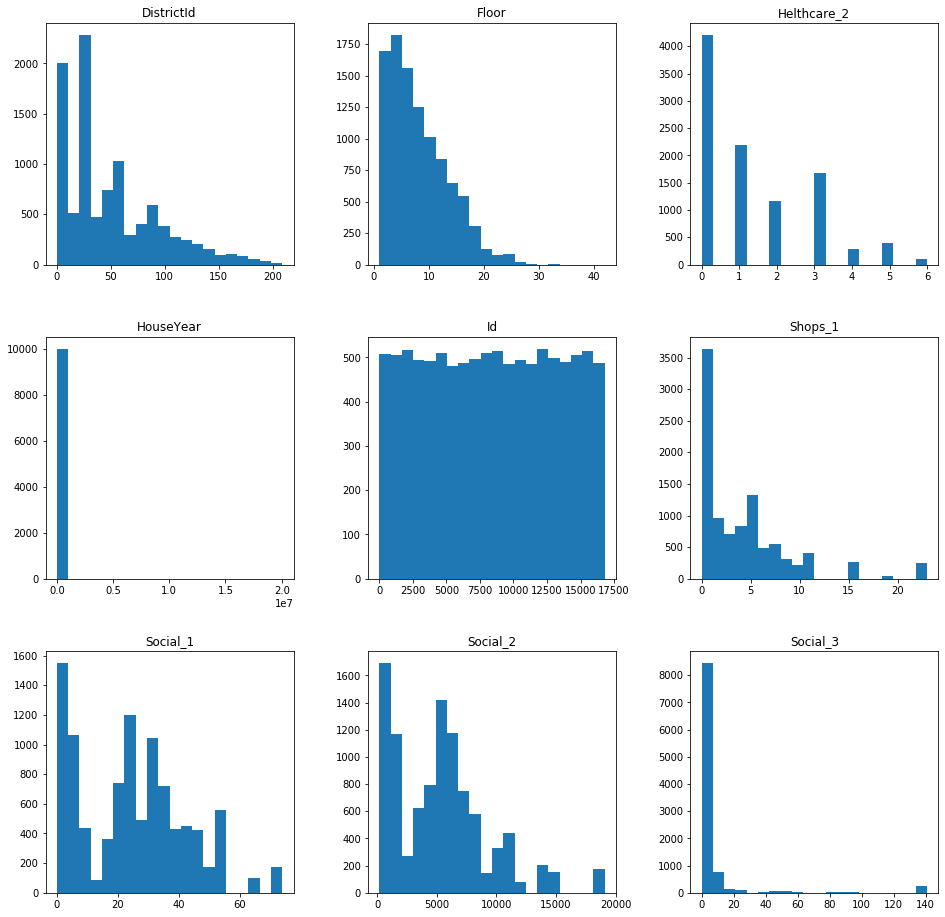

In [209]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

#### видим, что данные распределенны равномерно. ВЫБРОСЫ есть, но их не много, что не должно сказать на модели. Найдем список некоторых несоответвий. Кухня больше больше общей площади:

In [240]:
df.query('(Square>200) | (Rooms>5)')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
590,14990,23,2.0,263.542020,48.449873,5.0,6,5.0,1972,0.075779,...,1,6,1437,3,NaN,0,2,1,141780.231857,215.092147
4690,2307,102,1.0,410.639749,409.425181,10.0,4,4.0,2016,0.238617,...,1,26,3889,6,705.0,3,6,1,90470.430830,1.214568
8437,15886,85,3.0,461.463614,78.059331,10.0,12,16.0,1998,0.037178,...,1,52,11217,1,2300.0,1,7,1,394253.299978,383.404284
9910,16568,27,4.0,201.627361,200.334539,25.0,1,2.0,2013,0.041116,...,1,53,14892,4,NaN,1,4,1,528560.506016,1.292822
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,...,1,74,19083,2,NaN,5,15,1,317265.323792,22.833903
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,...,1,1,264,0,NaN,0,1,1,78364.616704,20.226758
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,1,9,1892,0,NaN,0,1,1,302211.260887,1.701236
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,...,0,31,7010,5,4508.0,3,7,1,455264.882666,41.695975
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,...,1,66,10573,1,1322.0,3,8,1,229661.964416,20.712089
4262,28,9,2.0,604.705972,586.223934,1.0,17,18.0,1977,0.161532,...,1,25,5648,1,30.0,2,4,1,187717.242538,18.482038


In [244]:
df.query('((Square<KitchenSquare))')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,...,1,2,629,1,NaN,0,0,0,108337.484207,0.652759
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,...,1,21,5731,0,NaN,1,0,1,160488.033165,18.348144
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,...,1,4,915,0,NaN,0,0,1,99079.960518,19.503403
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,...,1,30,5285,0,645.0,6,6,1,105539.556275,12.998269


In [245]:
df=df.drop([1064,5149,7088,8584])
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,raz
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,...,1,0,168,0,NaN,0,0,1,95338.198549,1.437716
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,...,1,15,2787,2,520.0,0,7,1,435462.048070,2.129007
52,2301,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,...,1,1,264,0,NaN,0,1,1,199215.452229,3.824548
123,8753,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,...,1,53,13670,4,NaN,1,11,1,309688.592681,3.851446
153,9870,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,...,1,2,629,1,NaN,0,0,0,131797.472284,1.659828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,...,1,46,7960,6,350.0,3,11,1,196684.316040,19.925582
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,...,1,30,5562,0,NaN,0,5,0,189050.289571,20.982330
9997,5123,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,...,1,2,629,1,NaN,0,0,0,159143.805370,18.482038
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,...,0,30,5048,9,325.0,2,5,1,181595.339808,9.762414


## ОБУЧЕНИЕ МОДЕЛИ

In [246]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'raz']

In [254]:
y_train=df['Price']
y_train

28       95338.198549
44      435462.048070
52      199215.452229
123     309688.592681
153     131797.472284
            ...      
9995    196684.316040
9996    189050.289571
9997    159143.805370
9998    181595.339808
9999    218714.077615
Name: Price, Length: 9995, dtype: float64

In [257]:
X_train=df
X_train.drop(['Id','Healthcare_1','Price','raz'], axis='columns', inplace=True)
X_train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
28,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,1,1,0,168,0,0,0,1
44,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,1,1,15,2787,2,0,7,1
52,1,2.0,65.224603,61.400054,0.0,17,22.0,2016,0.007122,1,1,1,264,0,0,1,1
123,25,3.0,89.803753,85.952306,1.0,4,3.0,2017,0.069753,1,1,53,13670,4,1,11,1
153,62,1.0,53.491301,51.831473,1.0,5,1.0,2015,0.072158,1,1,2,629,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,3,11,1
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,0,5,0
9997,27,1.0,47.939008,29.456970,1.0,12,16.0,2015,0.072158,1,1,2,629,1,0,0,0
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,2,5,1


In [258]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" +
          str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [261]:
gb_model = GradientBoostingRegressor(max_depth=9)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=9,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.968
MAE:	11432.818
MSE:	273224924.57


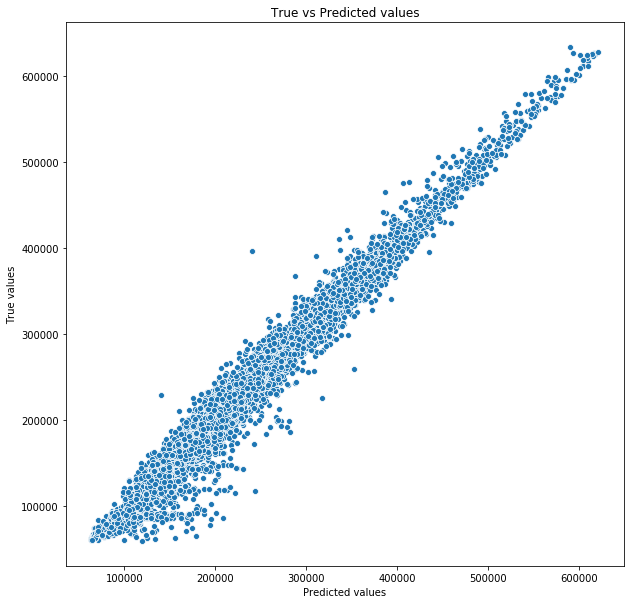

In [262]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

In [263]:
with open('model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

#### Модель сохранили. Теперь настраиваем тестовые данные.

In [282]:
X_test=pd.read_csv('test.csv')
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [283]:
X_test.loc[X_test['Shops_2'] == "A", 'Shops_2'] = 0
X_test.loc[X_test['Shops_2'] == "B", 'Shops_2'] = 1
X_test['Shops_2']=X_test['Shops_2'].astype(int)
X_test.loc[X_test['Ecology_2'] == "A", 'Ecology_2'] = 0
X_test.loc[X_test['Ecology_2'] == "B", 'Ecology_2'] = 1
X_test['Ecology_2']=df['Ecology_2'].astype(int)
X_test.loc[X_test['Ecology_3'] == "A", 'Ecology_3'] = 0
X_test.loc[X_test['Ecology_3'] == "B", 'Ecology_3'] = 1
X_test['Ecology_3']=X_test['Ecology_3'].astype(int)
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1.0,1,11,2748,1,NaN,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,1.0,1,6,1437,3,NaN,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1.0,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1.0,1,2,629,1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1.0,1,36,5992,0,NaN,1,1,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1.0,1,1,264,0,NaN,0,1,1
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1.0,1,74,19083,2,NaN,5,15,1
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,1.0,1,2,629,1,NaN,0,0,0


In [284]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      4998 non-null   float64
 11  Ecology_3      5000 non-null   int32  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [285]:
X_test3=X_test.loc[X_test["LifeSquare"]>X_test["Square"]]
X_test3

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,4702.0,5,5,1
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,1.0,1,23,5735,3,1084.0,0,5,1
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,1.0,1,4,915,0,NaN,0,0,1
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,1.0,1,1,264,0,NaN,0,1,1
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,1.0,1,22,6398,141,1046.0,3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,1.0,1,1,264,0,NaN,0,1,1
4951,3711,94,1.0,41.281057,42.392594,10.0,13,13.0,2014,0.282798,1.0,1,33,8667,2,NaN,0,6,1
4962,5820,94,1.0,33.680382,34.198977,1.0,10,9.0,1972,0.127376,1.0,1,43,8429,3,NaN,3,9,1
4969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,1.0,1,35,7715,4,990.0,0,6,1


In [286]:
X_test3_1=X_test.loc[X_test["LifeSquare"]<=X_test["Square"]]
X_test3_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1.0,1,11,2748,1,NaN,0,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1.0,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1.0,1,2,629,1,NaN,0,0,0
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,1.0,1,6,1437,3,NaN,0,2,1
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,1.0,1,46,7960,6,350.0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,1.0,0,30,5048,9,325.0,2,5,1
4994,6836,39,2.0,45.131282,30.780551,6.0,2,5.0,1965,0.428826,1.0,1,25,5011,8,730.0,0,2,1
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1.0,1,36,5992,0,NaN,1,1,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1.0,1,1,264,0,NaN,0,1,1


In [287]:
X_test4=X_test3.copy()
X_test4["LifeSquare"], X_test4["Square"]=X_test3["Square"], X_test3["LifeSquare"]
X_test4

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,15.948246,13.597819,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,4702.0,5,5,1
27,11160,58,1.0,48.752502,48.610661,1.0,4,3.0,1977,0.437885,1.0,1,23,5735,3,1084.0,0,5,1
39,6624,27,1.0,42.434887,42.413793,10.0,12,17.0,2017,0.011654,1.0,1,4,915,0,NaN,0,0,1
43,11513,1,1.0,40.593036,37.484057,0.0,4,17.0,1977,0.007122,1.0,1,1,264,0,NaN,0,1,1
70,1872,30,2.0,52.798349,52.449057,1.0,17,17.0,2016,0.000078,1.0,1,22,6398,141,1046.0,3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3.0,79.958685,77.229885,1.0,18,17.0,1977,0.007122,1.0,1,1,264,0,NaN,0,1,1
4951,3711,94,1.0,42.392594,41.281057,10.0,13,13.0,2014,0.282798,1.0,1,33,8667,2,NaN,0,6,1
4962,5820,94,1.0,34.198977,33.680382,1.0,10,9.0,1972,0.127376,1.0,1,43,8429,3,NaN,3,9,1
4969,4821,74,2.0,82.585069,82.542507,0.0,4,17.0,2015,0.309479,1.0,1,35,7715,4,990.0,0,6,1


In [288]:
X_test5=pd.concat([X_test4,X_test3_1], axis=0)
X_test5

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,15.948246,13.597819,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,4702.0,5,5,1
27,11160,58,1.0,48.752502,48.610661,1.0,4,3.0,1977,0.437885,1.0,1,23,5735,3,1084.0,0,5,1
39,6624,27,1.0,42.434887,42.413793,10.0,12,17.0,2017,0.011654,1.0,1,4,915,0,NaN,0,0,1
43,11513,1,1.0,40.593036,37.484057,0.0,4,17.0,1977,0.007122,1.0,1,1,264,0,NaN,0,1,1
70,1872,30,2.0,52.798349,52.449057,1.0,17,17.0,2016,0.000078,1.0,1,22,6398,141,1046.0,3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,1.0,0,30,5048,9,325.0,2,5,1
4994,6836,39,2.0,45.131282,30.780551,6.0,2,5.0,1965,0.428826,1.0,1,25,5011,8,730.0,0,2,1
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1.0,1,36,5992,0,NaN,1,1,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1.0,1,1,264,0,NaN,0,1,1


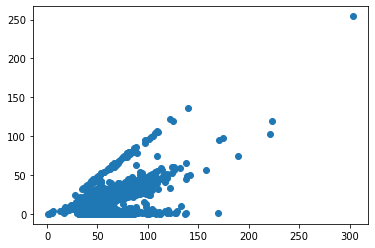

In [289]:
plt.scatter(X_test5["Square"], X_test5["Square"]-X_test5["LifeSquare"])

In [290]:
X_test_1=X_test5.copy()
X_test_1["raz"]=X_test5["Square"]-X_test5["LifeSquare"]
X_test_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,raz
2,5480,190,1.0,15.948246,13.597819,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,4702.0,5,5,1,2.350428
27,11160,58,1.0,48.752502,48.610661,1.0,4,3.0,1977,0.437885,1.0,1,23,5735,3,1084.0,0,5,1,0.141840
39,6624,27,1.0,42.434887,42.413793,10.0,12,17.0,2017,0.011654,1.0,1,4,915,0,NaN,0,0,1,0.021094
43,11513,1,1.0,40.593036,37.484057,0.0,4,17.0,1977,0.007122,1.0,1,1,264,0,NaN,0,1,1,3.108980
70,1872,30,2.0,52.798349,52.449057,1.0,17,17.0,2016,0.000078,1.0,1,22,6398,141,1046.0,3,23,1,0.349293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,1.0,0,30,5048,9,325.0,2,5,1,19.569143
4994,6836,39,2.0,45.131282,30.780551,6.0,2,5.0,1965,0.428826,1.0,1,25,5011,8,730.0,0,2,1,14.350731
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1.0,1,36,5992,0,NaN,1,1,1,16.324114
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1.0,1,1,264,0,NaN,0,1,1,18.391411


In [291]:
X_test["LifeSquare"].fillna((X_test["Square"]-18.482038), inplace=True)

In [292]:
#x222=X_test.copy()
X_test.drop('Healthcare_1', axis='columns', inplace=True)
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1.0,1,11,2748,1,0,0,1
1,15856,74,2.0,69.263183,50.781145,1.0,6,1.0,1977,0.075779,1.0,1,6,1437,3,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1.0,1,23,4583,3,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1.0,1,2,629,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1.0,1,36,5992,0,1,1,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1.0,1,1,264,0,0,1,1
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1.0,1,74,19083,2,5,15,1
4998,4780,62,2.0,81.305222,62.823184,0.0,4,0.0,1977,0.072158,1.0,1,2,629,1,0,0,0


In [293]:
id_X_test=X_test['Id']
id_X_test

0         725
1       15856
2        5480
3       15664
4       14275
        ...  
4995     8180
4996     4695
4997     5783
4998     4780
4999    12504
Name: Id, Length: 5000, dtype: int64

In [294]:
X_test.drop('Id', axis='columns', inplace=True)
X_test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1.0,1,11,2748,1,0,0,1
1,74,2.0,69.263183,50.781145,1.0,6,1.0,1977,0.075779,1.0,1,6,1437,3,0,2,1
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1.0,1,30,7538,87,5,5,1
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1.0,1,23,4583,3,3,3,1
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1.0,1,2,629,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1.0,1,36,5992,0,1,1,1
4996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1.0,1,1,264,0,0,1,1
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1.0,1,74,19083,2,5,15,1
4998,62,2.0,81.305222,62.823184,0.0,4,0.0,1977,0.072158,1.0,1,2,629,1,0,0,0


In [295]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      4998 non-null   float64
 10  Ecology_3      5000 non-null   int32  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   int32  
dtypes: float64(7), int32(2), int64(8)
memory usage: 625.

#### Есть немного пропусков в Ecology_2. Заменим на самое полуляное значение. Это 1 как показанно ниже

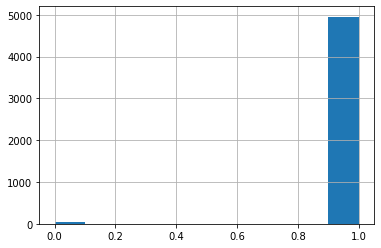

In [305]:
X_test['Ecology_2'].hist()
plt.show()

In [306]:
X_test["Ecology_2"] = X_test["Ecology_2"].fillna(1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   float64
 10  Ecology_3      5000 non-null   int32  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   int32  
dtypes: float64(7), int32(2), int64(8)
memory usage: 625.

In [307]:
X_test.shape

(5000, 17)

In [308]:
y_test=gb_model.predict(X_test)

In [133]:
y_test

array([158361.92854087, 219712.05779006, 192125.40152932, ...,
       339954.82668117, 203061.18549301, 171627.96040883])

In [309]:
X_test_1['Id']

2        5480
27      11160
39       6624
43      11513
70       1872
        ...  
4993    14562
4994     6836
4995     8180
4996     4695
4997     5783
Name: Id, Length: 3959, dtype: int64

In [310]:
pd_y_test=pd.Series(y_test)
pd_y_test

0       162689.617597
1       231657.469792
2       158347.724404
3       348367.359178
4       147074.790923
            ...      
4995    241011.982501
4996    133931.738491
4997    344134.816808
4998    216175.198922
4999    180768.765039
Length: 5000, dtype: float64

In [311]:
itog=pd.concat([id_X_test,pd_y_test], axis=1)
itog

,Id,0
0,725,162689.617597
1,15856,231657.469792
2,5480,158347.724404
3,15664,348367.359178
4,14275,147074.790923
...,...,...
4995,8180,241011.982501
4996,4695,133931.738491
4997,5783,344134.816808
4998,4780,216175.198922


In [312]:
itog.columns = ['Id','Price']
itog

,Id,Price
0,725,162689.617597
1,15856,231657.469792
2,5480,158347.724404
3,15664,348367.359178
4,14275,147074.790923
...,...,...
4995,8180,241011.982501
4996,4695,133931.738491
4997,5783,344134.816808
4998,4780,216175.198922


In [313]:
itog.to_csv("MMironov_predictions.csv", index =False)